In [6]:
import warnings
#from text_unidecode import unidecode
from collections import deque



import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

In [11]:
relations = [['IT', 'Technology Hardware, Storage and Peripherals'], ['IT', 'Interactive Media and Services'],
             ['IT', 'Systems Software'], ['Systems Software', 'MSFT'],
             ['Technology Hardware, Storage and Peripherals', 'AAPL'], [ 'Interactive Media and Services', 'GOOGL'],
             ['AAPL', 'Consumer Electronics'], ['AAPL', 'Phone Applications'], ['AAPL', 'Hardware'], 
             ['AAPL', 'Smart Watch'], ['AAPL', 'Cloud Services'], ['AAPL', 'Payment Services'],
             ['GOOGL', 'Advertising'], ['GOOGL', 'Cloud Services'], ['GOOGL', 'Hardware'], ['GOOGL', 'Phone Applications'],
            ['MSFT', 'IT Services'], ['MSFT', 'Hardware'], ['MSFT', 'Video Games'], ['MSFT', 'Consumer Electronics' ], ['MSFT', 'LinkedIn' ]]

In [12]:
source_target_df = pd.DataFrame(relations, columns = ['Source', 'Target'])
source_target_df

,Source,Target
0,IT,"Technology Hardware, Storage and Peripherals"
1,IT,Interactive Media and Services
2,IT,Systems Software
3,Systems Software,MSFT
4,"Technology Hardware, Storage and Peripherals",AAPL
5,Interactive Media and Services,GOOGL
6,AAPL,Consumer Electronics
7,AAPL,Phone Applications
8,AAPL,Hardware
9,AAPL,Smart Watch


<function matplotlib.pyplot.show(*args, **kw)>

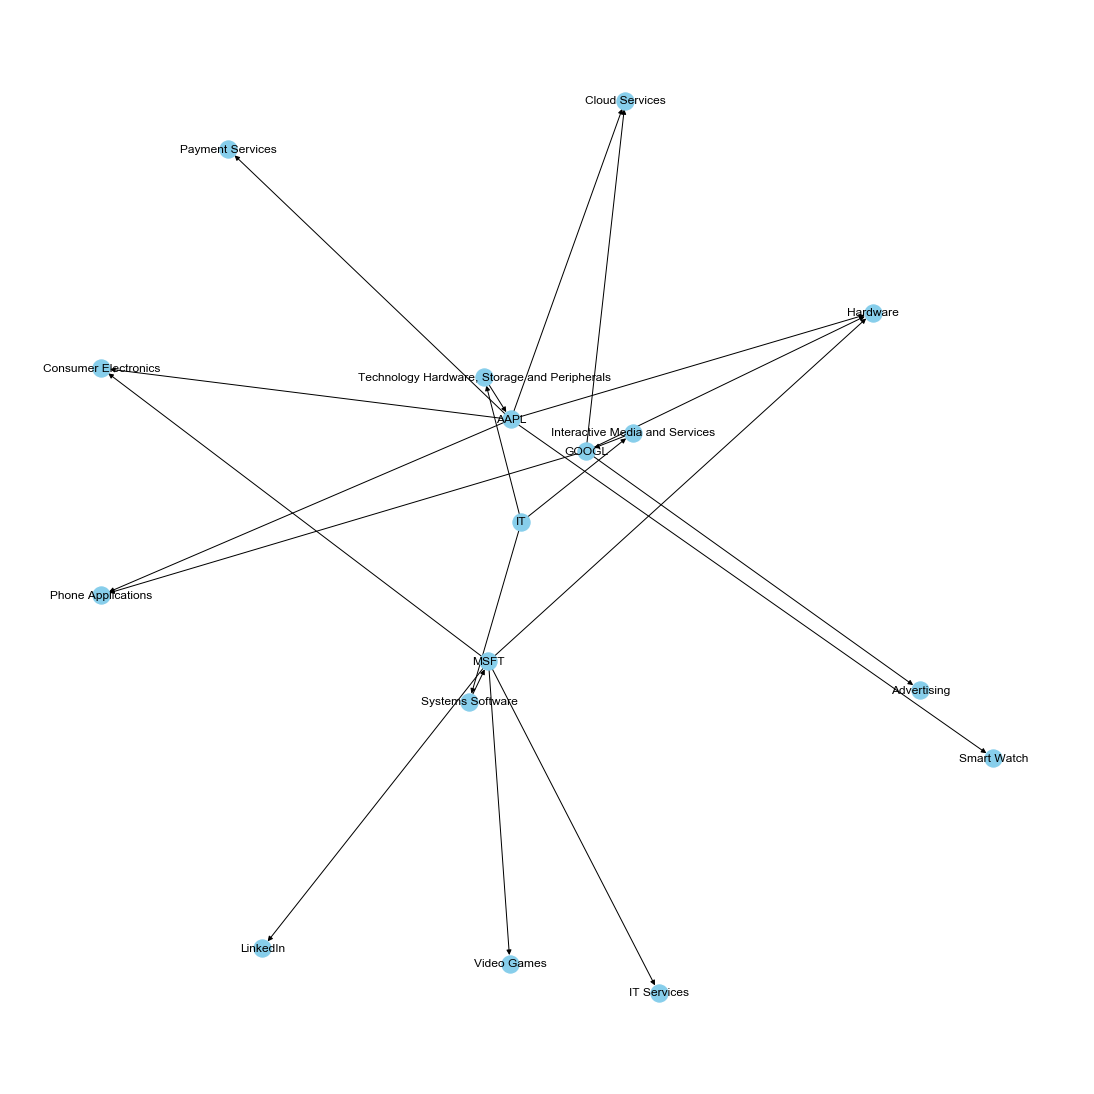

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

kg_df = pd.DataFrame({'source': source_target_df['Source'], 'target': source_target_df['Target'], 
                      'edge': source_target_df['Target']})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr = True, create_using = nx.MultiDiGraph())
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show